In [1]:
# Import All Subsystems
include("../examples/example_functions.jl")
include("../src/FiniteDifference.jl")
include("../src/NumericalContinuation.jl")
include("../src/NumericalShooting.jl")
include("../src/ODESolver.jl")
include("../src/Visualisation.jl")

plot_continuation (generic function with 1 method)

## 2d Comparison Plot

In [2]:
# Set parameters
kappa = 1   # diffusion constant
L = 2        # length of spatial domain
T = .5         # total time to solve for
mx = 20     # number of gridpoints in space
mt = 1000   # number of gridpoints in time

# Define custom boundary condition function (bcf)
function bcf(x,t)
    return 0
end

u_exact


# forward euler Estimate
fex, feu_j = finite_difference(u_I, kappa, L, T, mx, mt, boundary=bcf, method="forward_euler")
# Create trace
f_euler = scatter(x=fex, y=feu_j, mode="markers", name="forward euler", showlegend=true)


# backward euler Estimate
bex, beu_j = finite_difference(u_I, kappa, L, T, mx, mt, boundary=bcf, method="backward_euler")
# Create trace
b_euler = scatter(x=bex, y=beu_j, mode="markers", name="backward euler", showlegend=true)


# crank nicholson Estimate
cnx, cnu_j = finite_difference(u_I, kappa, L, T, mx, mt, boundary=bcf, method="crank_nicholson")
# Create trace
c_nicholson = scatter(x=cnx, y=cnu_j, mode="markers", name="crank nicholson", showlegend=true)



# Plot the final result and exact solution
xx = 0:L/250:L

# Create solution trace
exact = scatter(x=xx, y=u_exact(xx,T, L=L, κ=kappa), mode="lines", name="exact solution", showlegend=true)

layout = Layout(
    xaxis_title = "x",
    yaxis_title = string("u(x, ",string(T),")")
)

plot([exact, f_euler, b_euler, c_nicholson], layout)

data: [
  "scatter with fields mode, name, showlegend, type, x, and y",
  "scatter with fields mode, name, showlegend, type, x, and y",
  "scatter with fields mode, name, showlegend, type, x, and y",
  "scatter with fields mode, name, showlegend, type, x, and y"
]

layout: "layout with fields margin, template, xaxis, and yaxis"

## 3d Comparison Plot

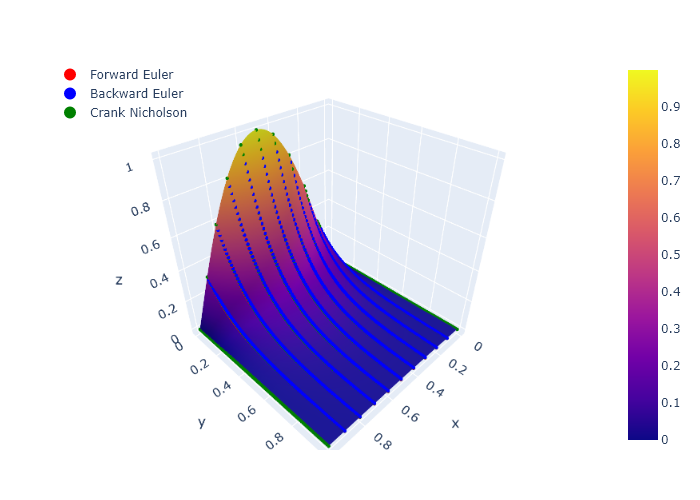

In [11]:
## 3d Finite Difference method comparison plot
kappa, L, T, mx, mt = 0.5, 1, 1, 10, 100

x = range(0, stop=L, length=mx+1)
t = range(0, stop=T, length=mt) .+ 0.0001

u_est = ones(mt)' .* x
v_est = t' .* ones(mx+1)

fe_z = Matrix{Float64}(undef, mx+1, mt)
be_z = Matrix{Float64}(undef, mx+1, mt)
cn_z = Matrix{Float64}(undef, mx+1, mt)

for i in 1:mt
    fex, fe_uj = finite_difference(u_I, kappa, L, t[i], mx, mt, method="fe")
    fe_z[:,i] = fe_uj
    bex, be_uj = finite_difference(u_I, kappa, L, t[i], mx, mt, method="be")
    be_z[:,i] = be_uj
    cnx, cn_uj = finite_difference(u_I, kappa, L, t[i], mx, mt, method="cn")
    cn_z[:,i] = cn_uj
end

# Estimate Surfaces
fe_estimate = scatter(x=vec(u_est), y=vec(v_est), z=vec(fe_z),name="Forward Euler",
    mode="markers",type="scatter3d",marker=attr(color="red",size=2))
be_estimate = scatter(x=vec(u_est), y=vec(v_est), z=vec(be_z),name="Backward Euler",
    mode="markers",type="scatter3d",marker=attr(color="blue",size=2))
cn_estimate = scatter(x=vec(u_est), y=vec(v_est), z=vec(cn_z),name="Crank Nicholson",
    mode="markers",type="scatter3d",marker=attr(color="green",size=2))

# Exact surface
x = range(0, stop=L, length=100)
t = range(0, stop=T, length=100)

u = ones(100)' .* x
v = t' .* ones(100)
z = u_exact(u, v, L=L, κ=kappa)

exact = surface(
    x=u, 
    y=v, 
    z=z,
    name="Exact Solution",
    opacity=1
)

# Plot
layout = Layout(
    showlegend=true,
    legend=attr(x=0, y=1),
    legend_itemsizing="constant",
    xaxis_title = "x",
    yaxis_title = "t",
    zaxis_title = "z"
)

plot([exact,fe_estimate,be_estimate,cn_estimate], layout)